<div class="alert alert-block alert-success">
    <b><center>CNN Basic Examples</center></b>
    <b><center>RSNET</center></b>
</div>

# Configure Learning Environment

In [1]:
# !pip install git+https://github.com/nockchun/rspy --force
# !pip install mybatis_mapper2sql
import rspy as rsp
rsp.setSystemWarning(off=True)

In [2]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers, models, losses, optimizers, datasets, preprocessing, utils

In [3]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
np.set_printoptions(linewidth=200, precision=2)
tf.__version__

'2.2.0'

# CIFAR10 Dataset
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [5]:
# Download the mnist dataset using keras
(train_data, train_label), (test_data, test_label) = datasets.cifar10.load_data()
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [6]:
# Counting unique value of train data
unique, counts = np.unique(train_label, return_counts=True)
num_labels = len(unique)
f"Train labels: {dict(zip(unique, counts))}"

'Train labels: {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}'

# Preprocessing

In [7]:
# Normalizing
train_data_proc = train_data / 255
test_data_proc = test_data / 255

#One hot encoding
train_label_proc = utils.to_categorical(train_label, 10)
test_label_proc = utils.to_categorical(test_label, 10)

# Base-Line Model

In [8]:
input_base = layers.Input((32, 32, 3))

In [9]:
layer_base = layers.Conv2D(32, 4, activation="relu")(input_base)
layer_base = layers.MaxPool2D(2)(layer_base)
layer_base = layers.Conv2D(64, 3, activation="relu")(layer_base)
layer_base = layers.MaxPool2D(2)(layer_base)

In [10]:
layer_base  = layers.Flatten()(layer_base)
layer_base  = layers.Dense(256, activation="relu")(layer_base)
output_base = layers.Dense(10, activation="softmax")(layer_base)

In [11]:
model_base = models.Model(input_base, output_base)
model_base.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               590080

In [12]:
model_base.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

In [13]:
history_base = model_base.fit(
    train_data_proc, train_label_proc,
    validation_data=(test_data_proc, test_label_proc),
    batch_size=256,
    epochs=50
)

Epoch 1/50
196/196 [==============================] - 12s 64ms/step - loss: 1.6088 - accuracy: 0.4208 - val_loss: 1.3854 - val_accuracy: 0.5149
Epoch 2/50
196/196 [==============================] - 1s 5ms/step - loss: 1.2574 - accuracy: 0.5553 - val_loss: 1.1948 - val_accuracy: 0.5804
Epoch 3/50
196/196 [==============================] - 1s 5ms/step - loss: 1.1141 - accuracy: 0.6092 - val_loss: 1.0750 - val_accuracy: 0.6250
Epoch 4/50
196/196 [==============================] - 1s 5ms/step - loss: 1.0121 - accuracy: 0.6469 - val_loss: 1.0016 - val_accuracy: 0.6542
Epoch 5/50
196/196 [==============================] - 1s 5ms/step - loss: 0.9474 - accuracy: 0.6695 - val_loss: 1.0343 - val_accuracy: 0.6397
Epoch 6/50
196/196 [==============================] - 1s 5ms/step - loss: 0.8965 - accuracy: 0.6885 - val_loss: 0.9521 - val_accuracy: 0.6706
Epoch 7/50
196/196 [==============================] - 1s 5ms/step - loss: 0.8289 - accuracy: 0.7150 - val_loss: 0.9232 - val_accuracy: 0.6846
Epoc

<AxesSubplot:>

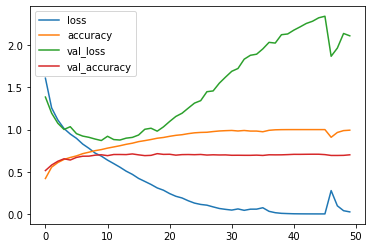

In [14]:
pd.DataFrame(history_base.history).plot()

# Advanced Model

In [15]:
input_adv = layers.Input((32, 32, 3))

In [16]:
layer_adv = layers.Conv2D(32, 4, activation="relu")(input_adv)
layer_adv = layers.Conv2D(32, 4, activation="relu")(input_adv)
layer_adv = layers.MaxPool2D(2)(layer_adv)
layer_adv = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_adv)
layer_adv = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_adv)
layer_adv = layers.MaxPool2D(2)(layer_adv)
layer_adv = layers.Conv2D(128, 3, padding="same", dilation_rate=2, activation="relu")(layer_adv)
layer_adv  = layers.GlobalAveragePooling2D()(layer_adv)

In [17]:
output_adv = layers.Dense(10, activation="softmax")(layer_adv)

In [18]:
model_adv = models.Model(input_adv, output_adv)
model_adv.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         7385

In [19]:
model_adv.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

In [20]:
history_dev = model_adv.fit(
    train_data_proc, train_label_proc,
    validation_data=(test_data_proc, test_label_proc),
    batch_size=256,
    epochs=50
)

Epoch 1/50
196/196 [==============================] - 35s 177ms/step - loss: 1.8724 - accuracy: 0.3052 - val_loss: 1.6735 - val_accuracy: 0.3865
Epoch 2/50
196/196 [==============================] - 2s 8ms/step - loss: 1.5681 - accuracy: 0.4219 - val_loss: 1.5196 - val_accuracy: 0.4503
Epoch 3/50
196/196 [==============================] - 2s 8ms/step - loss: 1.4471 - accuracy: 0.4733 - val_loss: 1.3833 - val_accuracy: 0.5003
Epoch 4/50
196/196 [==============================] - 2s 8ms/step - loss: 1.3403 - accuracy: 0.5180 - val_loss: 1.2662 - val_accuracy: 0.5458
Epoch 5/50
196/196 [==============================] - 2s 8ms/step - loss: 1.2587 - accuracy: 0.5468 - val_loss: 1.2463 - val_accuracy: 0.5547
Epoch 6/50
196/196 [==============================] - 2s 8ms/step - loss: 1.1898 - accuracy: 0.5759 - val_loss: 1.1620 - val_accuracy: 0.5908
Epoch 7/50
196/196 [==============================] - 2s 8ms/step - loss: 1.1378 - accuracy: 0.5957 - val_loss: 1.1176 - val_accuracy: 0.6012
Epo

<AxesSubplot:>

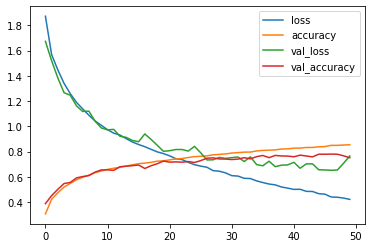

In [21]:
pd.DataFrame(history_dev.history).plot()

# Drop-Out Model

In [22]:
input_dout = layers.Input((32, 32, 3))

In [23]:
layer_dout = layers.Conv2D(32, 4, activation="relu")(input_dout)
layer_dout = layers.Conv2D(32, 4, activation="relu")(layer_dout)
layer_dout = layers.MaxPool2D(2)(layer_dout)
layer_dout = layers.Dropout(0.4)(layer_dout)
layer_dout = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_dout)
layer_dout = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_dout)
layer_dout = layers.MaxPool2D(2)(layer_dout)
layer_dout = layers.Dropout(0.4)(layer_dout)
layer_dout = layers.Conv2D(128, 3, padding="same", dilation_rate=2, activation="relu")(layer_dout)
layer_dout  = layers.GlobalAveragePooling2D()(layer_dout)

In [24]:
output_dout = layers.Dense(10, activation="softmax")(layer_dout)

In [25]:
model_dout = models.Model(input_dout, output_dout)
model_dout.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 32)        16416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        3692

In [26]:
model_dout.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

In [27]:
history_dout = model_dout.fit(
    train_data_proc, train_label_proc,
    validation_data=(test_data_proc, test_label_proc),
    batch_size=256,
    epochs=50
)

Epoch 1/50
196/196 [==============================] - 47s 239ms/step - loss: 1.8561 - accuracy: 0.3061 - val_loss: 1.5895 - val_accuracy: 0.4129
Epoch 2/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5229 - accuracy: 0.4383 - val_loss: 1.4830 - val_accuracy: 0.4529
Epoch 3/50
196/196 [==============================] - 2s 10ms/step - loss: 1.4151 - accuracy: 0.4845 - val_loss: 1.3331 - val_accuracy: 0.5143
Epoch 4/50
196/196 [==============================] - 2s 10ms/step - loss: 1.3234 - accuracy: 0.5207 - val_loss: 1.2393 - val_accuracy: 0.5565
Epoch 5/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2542 - accuracy: 0.5492 - val_loss: 1.1793 - val_accuracy: 0.5759
Epoch 6/50
196/196 [==============================] - 2s 10ms/step - loss: 1.1843 - accuracy: 0.5783 - val_loss: 1.1256 - val_accuracy: 0.5997
Epoch 7/50
196/196 [==============================] - 2s 10ms/step - loss: 1.1229 - accuracy: 0.6023 - val_loss: 1.0958 - val_accuracy: 0.60

<AxesSubplot:>

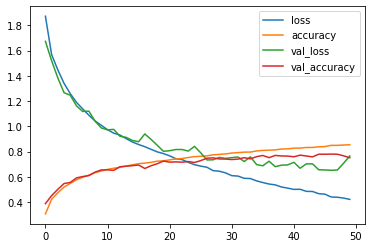

In [28]:
pd.DataFrame(history_dev.history).plot()

# Batch Normalization Model

In [29]:
input_nor = layers.Input((32, 32, 3))

In [30]:
layer_nor = layers.Conv2D(32, 4, activation="relu")(input_nor)
layer_nor = layers.BatchNormalization()(layer_nor)
layer_nor = layers.Conv2D(32, 4, activation="relu")(layer_nor)
layer_nor = layers.BatchNormalization()(layer_nor)
layer_nor = layers.MaxPool2D(2)(layer_nor)
layer_nor = layers.Dropout(0.4)(layer_nor)
layer_nor = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_nor)
layer_nor = layers.BatchNormalization()(layer_nor)
layer_nor = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_nor)
layer_nor = layers.BatchNormalization()(layer_nor)
layer_nor = layers.MaxPool2D(2)(layer_nor)
layer_nor = layers.Dropout(0.4)(layer_nor)
layer_nor = layers.Conv2D(128, 3, padding="same", dilation_rate=2, activation="relu")(layer_nor)
layer_nor = layers.BatchNormalization()(layer_nor)
layer_nor  = layers.GlobalAveragePooling2D()(layer_nor)

In [31]:
output_nor = layers.Dense(10, activation="softmax")(layer_nor)

In [32]:
model_nor = models.Model(input_nor, output_nor)
model_nor.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 29, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 32)        16416     
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 32)        0   

In [33]:
model_nor.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

In [34]:
history_nor = model_nor.fit(
    train_data_proc, train_label_proc,
    validation_data=(test_data_proc, test_label_proc),
    batch_size=256,
    epochs=50
)

Epoch 1/50
196/196 [==============================] - 31s 157ms/step - loss: 1.3790 - accuracy: 0.5031 - val_loss: 3.8670 - val_accuracy: 0.1030
Epoch 2/50
196/196 [==============================] - 2s 11ms/step - loss: 1.0476 - accuracy: 0.6266 - val_loss: 2.8999 - val_accuracy: 0.1743
Epoch 3/50
196/196 [==============================] - 2s 11ms/step - loss: 0.9056 - accuracy: 0.6826 - val_loss: 1.0587 - val_accuracy: 0.6187
Epoch 4/50
196/196 [==============================] - 2s 11ms/step - loss: 0.8060 - accuracy: 0.7169 - val_loss: 0.8783 - val_accuracy: 0.6928
Epoch 5/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7377 - accuracy: 0.7426 - val_loss: 0.7782 - val_accuracy: 0.7279
Epoch 6/50
196/196 [==============================] - 2s 11ms/step - loss: 0.6894 - accuracy: 0.7584 - val_loss: 0.7465 - val_accuracy: 0.7405
Epoch 7/50
196/196 [==============================] - 2s 11ms/step - loss: 0.6511 - accuracy: 0.7739 - val_loss: 0.6753 - val_accuracy: 0.76

<AxesSubplot:>

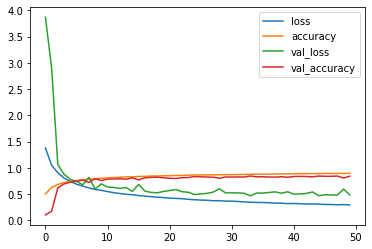

In [35]:
pd.DataFrame(history_nor.history).plot()

# Data Augmentation

In [36]:
input_aug = layers.Input((32, 32, 3))

In [37]:
layer_aug = layers.Conv2D(32, 4, activation="relu")(input_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.Conv2D(32, 4, activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.MaxPool2D(2)(layer_aug)
layer_aug = layers.Dropout(0.4)(layer_aug)
layer_aug = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.Conv2D(64, 3, padding="same", activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug = layers.MaxPool2D(2)(layer_aug)
layer_aug = layers.Dropout(0.4)(layer_aug)
layer_aug = layers.Conv2D(128, 3, padding="same", dilation_rate=2, activation="relu")(layer_aug)
layer_aug = layers.BatchNormalization()(layer_aug)
layer_aug  = layers.GlobalAveragePooling2D()(layer_aug)

In [38]:
output_aug = layers.Dense(10, activation="softmax")(layer_aug)

In [39]:
model_aug = models.Model(input_aug, output_aug)

In [40]:
model_aug.compile(
    loss=losses.CategoricalCrossentropy(),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

In [41]:
image_gen = preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.1
)
train_gen = image_gen.flow(train_data_proc, train_label_proc)

In [42]:
history_aug = model_aug.fit(
    train_gen,
    validation_data=(test_data_proc, test_label_proc),
    batch_size=256,
    epochs=50
)

Epoch 1/50
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4241 - accuracy: 0.4860 - val_loss: 1.3047 - val_accuracy: 0.5480
Epoch 2/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1303 - accuracy: 0.6012 - val_loss: 1.0665 - val_accuracy: 0.6291
Epoch 3/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0106 - accuracy: 0.6450 - val_loss: 1.0710 - val_accuracy: 0.6360
Epoch 4/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9454 - accuracy: 0.6670 - val_loss: 1.2393 - val_accuracy: 0.6119
Epoch 5/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9024 - accuracy: 0.6838 - val_loss: 0.9554 - val_accuracy: 0.6780
Epoch 6/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8581 - accuracy: 0.7002 - val_loss: 0.8725 - val_accuracy: 0.7017
Epoch 7/50
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8324 - accuracy: 0.7083 - val_loss: 0.7741 -

<AxesSubplot:>

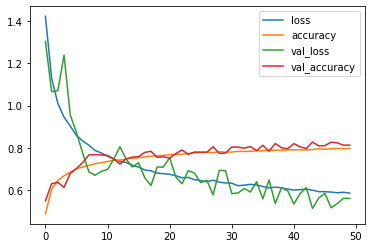

In [43]:
pd.DataFrame(history_aug.history).plot()